## Einfache lineare Regression - Ein Beispiel
----------------------------------------

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
from random import sample
from scipy.stats import t
from scipy.stats import chi2
from scipy import stats
import scipy.stats
#from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


%run ../src/notebook_env.py


---------------------------------
Working on the host: LAPTOP-9LETB4SJ

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:52:24) [MSC v.1929 64 bit (AMD64)]

---------------------------------
Python interpreter: C:\Users\zak\anaconda3\envs\srh\python.exe


Um einige praktische Erfahrungen zu sammeln, wenden wir die einfache lineare Regression in einer Übung an. Dazu laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Importieren Sie den Datensatz und geben Sie ihm einen passenden Namen.

In [75]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv('students.csv', index_col=0)

Der `students` Datensatz besteht aus 8239 Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und 16 Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: stud.id, name, gender, age, height, weight, religion, nc.score, semester, major, minor, score1, score2, online.tutorial, graduated, salary.

Um die **einfache lineare Regression** zu veranschaulichen, untersuchen wir die Beziehung zwischen zwei Variablen, `height` der Studenten als Prädiktorvariable und `weight` der Studierenden als Antwortvariable.

### Vorbereitung der Daten

Zur Datenaufbereitung ziehen wir eine Zufallsstichprobe von $12$ Studenten aus dem Datensatz und erstellen einen Datensatz mit den zwei Variablen von Interesse (`height` und `weight`). Außerdem stellen wir die Daten in Form eines Streudiagramms dar, um die zugrunde liegende lineare Beziehung zwischen den beiden Variablen zu visualisieren.

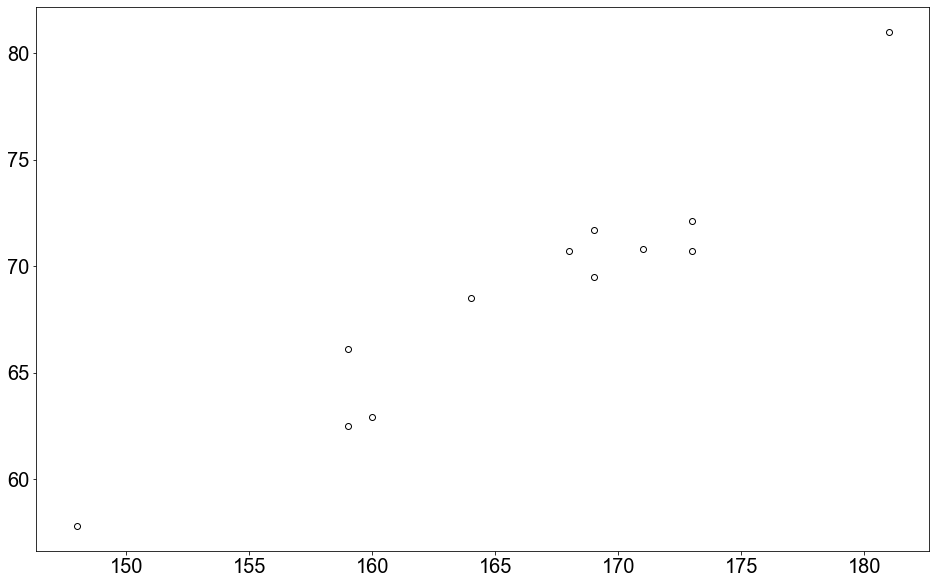

In [76]:
n = 12

sample_idx = students.sample(n, random_state=2)
data = pd.DataFrame(sample_idx['height'])
data['weight'] = sample_idx['weight']

fig = plt.figure()
plt.scatter(data['height'],data['weight'],edgecolor ='k',color = 'white')
plt.show()

Die visuelle Inspektion bestätigt unsere Vermutung, dass die Beziehung zwischen der Größe und der Gewichtsvariable ungefähr linear ist. Mit anderen Worten: Mit zunehmender Größe neigt der einzelne Studierende dazu, ein höheres Gewicht zu haben.

### Schätzung der Parameter

#### Lösen für $\beta_0$ und $\beta_1$ analytisch in Python

Wie im vorherigen Abschnitt gezeigt, können die Parameter $\beta_0$ und $\beta_1$ eines einfachen linearen Modells analytisch berechnet werden. Erinnern Sie sich an die Gleichung für ein lineares Modell aus Stichprobendaten

$$\hat y = \beta_0 + \beta_1 x + e \text{,}$$

für $\beta_1$

$$\hat{\beta_1} = \frac{\sum_{i=1}^n ((x_i- \bar x) (y_i-\bar y))}{\sum_{i=1}^n (x_i-\bar x)^2} = \frac{cov(x,y)}{var(x)}\text{,}$$

und für $\beta_0$

$$\hat{\beta_0} = \bar y -\hat{\beta_1} \bar x$$

Zum besseren Verständnis verwenden wir Python, um die einzelnen Terme zu berechnen

In [77]:
# Calculate b1

x = data['height']
y = data['weight']
x_bar = np.mean(x)
y_bar = np.mean(y)

b1 = np.sum((x-x_bar)*(y-y_bar)) / np.sum((x-x_bar)**2)
b1

0.6507615230460924

Die Steigung des Regressionsmodells beträgt ungefähr $0,65$. Zur Überprüfung der Korrektheit berechnen wir das Verhältnis der Kovarianz von $x$ und $y$ mit der Funktion `cov()` und die Varianz von $x$ mit der Funktion `var()` und vergleichen es mit dem Ergebnis von oben.

In [78]:
np.cov(x,y,ddof=0)[0][1]/np.var(x)

0.6507615230460924

Eine perfekte Übereinstimmung!

Weiter berechnen wir $\beta_0$.

In [79]:
# Calculate b0
b0 = y_bar - b1*x_bar
b0

-39.443206412825674

Der Achsenabschnitt $\beta_0$ des Regressionsmodells beträgt ungefähr $-39,44$.

Wir können also das Regressionsmodell aufschreiben

$$\text{Gewicht} = -39,44 + 0,65 \times \text{Höhe}$$

Auf der Grundlage dieser Gleichung können wir nun das Gewicht eines Studenten anhand seiner Größe bestimmen. Lassen Sie uns zum Spaß das Gewicht von Studierenden mit einer Größe von $156$, $178$ und $192$ cm vorhersagen.

$$\text{Gewicht}_{156} = -39,44 + 0,65 \times \text{156} \approx 62 \ \text{kg}$$

$$\text{Gewicht}_{178} = -39,44 + 0,65 \times \text{178} \approx 76 \ \text{kg}$$

$$\text{Gewicht}_{192} = -39,44 + 0,65 \times \text{192} \approx 85 \ \text{kg}$$

#### Verwenden Sie die Funktion `linregress()` bzw `OLS()` in Python, um $\beta_0$ zu berechnen und $\beta_1$

Zum einen können wir die Funktion `linregress()` nutzen um $\beta_0$ und $\beta_1$ zu berechnen.

In [80]:
gradient, intercept, r_value, p_value, stderr = stats.linregress(data['height'],data['weight'])
print("beta_0 =", intercept)
print("beta_1 =", gradient)

beta_0 = -39.44320641282566
beta_1 = 0.6507615230460922


Eine andere Möglichkeit ist es die Funktion `OLS()` zu nutzen, die zusätzlich zur Berechnung von $\beta_1 , \beta_0$ viele weitere Möglichkeiten bietet

In [81]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
#predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.params

const    -39.443206
height     0.650762
dtype: float64

Die Ausgabe über die Methode `params` liefert den Achsenabschnitt und den Regressionskoeffizienten. Weiters kann die Methode `summary()` nützlich sein, wenn Sie auf andere Eigenschaft des Modellobjekts zugreifen möchten.

In [82]:
# Print out the statistics
model.summary()

C:\Users\zak\anaconda3\envs\srh\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     115.9
Date:                Tue, 17 May 2022   Prob (F-statistic):           8.05e-07
Time:                        16:51:41   Log-Likelihood:                -22.602
No. Observations:                  12   AIC:                             49.20
Df Residuals:                      10   BIC:                             50.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.4432     10.057     -3.922      0.003     -61.851     -17.036
height         0.6508      0.060     10.766      0.000       0.516       0.785
==============================================================================
Omnibus:                        2.161   Durbin-Watson:                   1.442
Prob(Omnibus):                  0.339   Jarque-Bera (JB):                0.923
Skew:                           0.110   Prob(JB):                        0.630
Kurtosis:                       1.659   Cond. No.                     3.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Es gibt viele weitere Eigenschaften eines `OLS`-Objekts, auf die durch die Anwendungen von Methoden zugegriffen werden kann. Die Funktion dir() gibt einen Überblick über die Struktur des Modellobjekts.

In [83]:
dir(model)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_c

### Extraktor-Methoden

Modellobjekts in Python zuzugreifen, ist die Anwendung sogenannter Extraktormethoden. Lassen Sie uns das lineare Modell von oben rekonstruieren, die Modellausgabe der Variablen `model` zuweisen und einige nützliche Extraktormethoden anwenden.

In [84]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

Wie schon erwähnt gibt die `params` Methode die Modellkoeffizienten zurück.

In [85]:
model.params

const    -39.443206
height     0.650762
dtype: float64

Die Methode `conf_int()` gibt das Konfidenzintervall für die Modellkoeffizienten für ein bestimmtes Konfidenzniveau zurück (Standardeinstellung entspricht $\alpha = 0.05$.

In [86]:
model.conf_int(alpha = 0.05)

,0,1
const,-61.850735,-17.035678
height,0.516081,0.785442


Eine weitere nützliche Extraktormethode ist die Funktion `resid()`.

In [87]:
model.resid

3594    1.164509
4152    2.655371
7136    0.930501
5100   -1.038537
339     0.815271
4433    2.072124
2767   -1.035491
2727   -1.527876
7099   -2.438537
2388    1.218317
2124   -1.037014
8170   -1.778637
dtype: float64

Wir können sofort überprüfen, ob die Summe der Residuen ($\sum e$) nahe bei Null liegt.

In [88]:
sum(model.resid)

-2.6290081223123707e-13

Cool, nahe an Null!

Um die erhaltene Regressionslinie zu zeichnen, verwenden wir die Funktion $y = \beta_0 + \beta_1 x$, die Linien auf der Grundlage des Achsenabschnitts ($\beta_0$) und der Steigung ($\beta_1$) zeichnet. Wir verwenden den Syntax `plot([x_1,x_2],[y_1,y_2])` um die Regressionsgerade zu plotten.

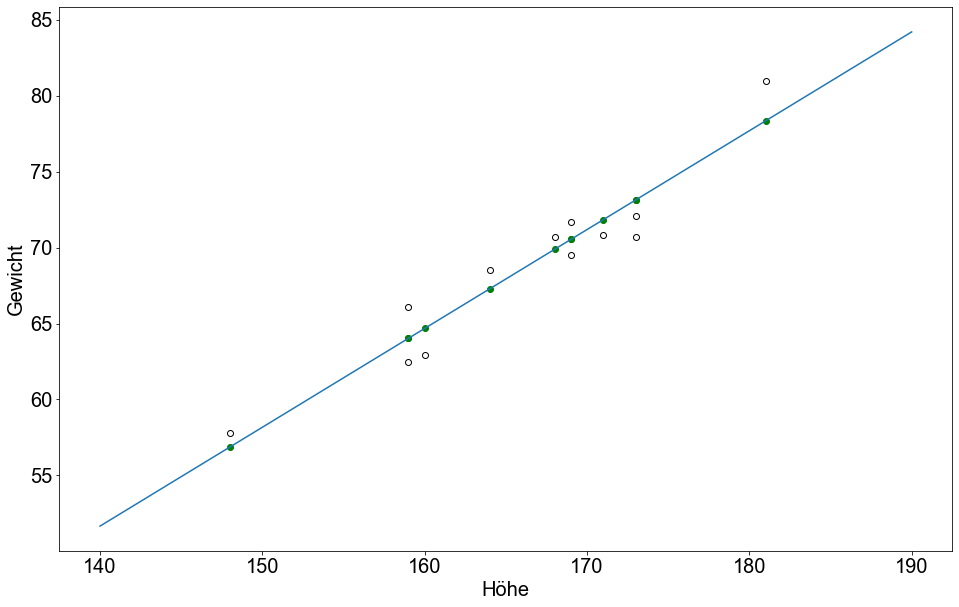

In [89]:
fig = plt.figure()
plt.scatter(data['height'],data['weight'],edgecolor ='k',color = 'white')
plt.scatter(data['height'],model.fittedvalues,color = 'green')
plt.plot([140,190],[51.663474 , 84.201574])
plt.ylabel('Gewicht')
plt.xlabel('Höhe')
plt.show()

Eine weitere besonders interessante Extraktormethode ist `predict()`. Wenn sie nicht spezifiziert ist, gibt die Methode `predict()` $\hat y_i$ für jedes einzelne $x_i$ zurück; ähnlich wie die Methode `fittedvalues`. Man kann jedoch auch neue Daten angeben und die Funktion `predict()` wird $\hat y_i$ für jedes gegebene $x_i$ vorhersagen. Beachten Sie, dass die neuen Daten ein Data-Frame-Objekt oder eine Liste sein müssen.

In [90]:
model.fittedvalues

3594    70.535491
4152    78.344629
7136    56.869499
5100    73.138537
339     69.884729
4433    64.027876
2767    70.535491
2727    64.027876
7099    73.138537
2388    67.281683
2124    71.837014
8170    64.678637
dtype: float64

In [91]:
print(model.predict(x))

3594    70.535491
4152    78.344629
7136    56.869499
5100    73.138537
339     69.884729
4433    64.027876
2767    70.535491
2727    64.027876
7099    73.138537
2388    67.281683
2124    71.837014
8170    64.678637
dtype: float64


In [92]:
pred = (165,172,183)
pred = sm.add_constant(pred)
model.predict(pred)

array([67.93244489, 72.48777555, 79.6461523 ])

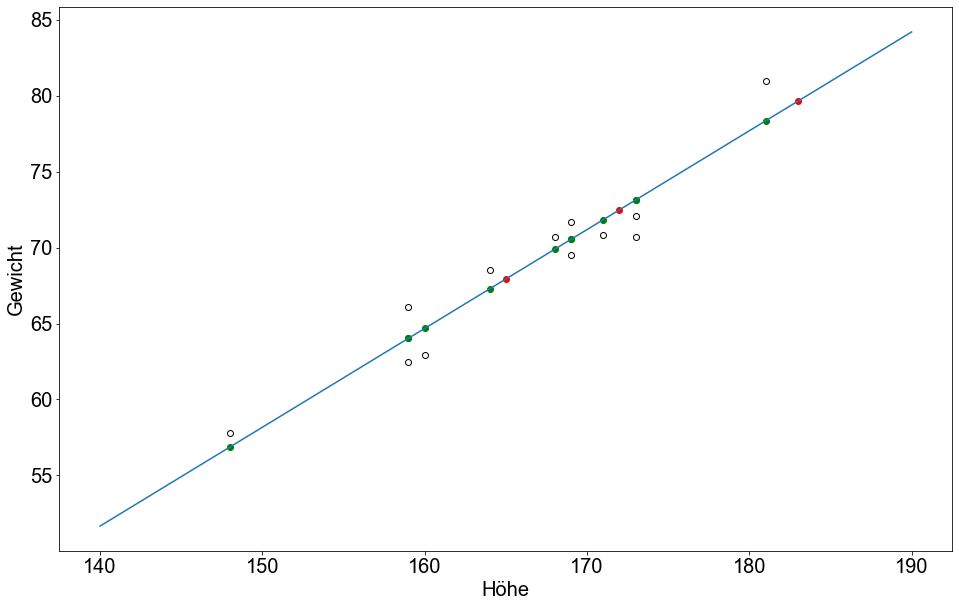

In [93]:
fig = plt.figure()
plt.scatter(data['height'],data['weight'],edgecolor ='k',color = 'white')
plt.scatter(data['height'],model.fittedvalues,color = 'green')
plt.plot([140,190],[51.663474 , 84.201574])
plt.scatter([165,172,183],[67.93244489,72.48777555,79.6461523],color = 'red')
plt.ylabel('Gewicht')
plt.xlabel('Höhe')
plt.show()

Darüber hinaus bietet Python einen einfachen Ansatz zur Erstellung von Fehlerbereichen um die angepasste Regressionslinie. Es gibt zwei Arten von Bändern, die als *schmale* und *breite* Bänder bezeichnet werden. Die schmalen Bänder, die so genannten <a href="https://en.wikipedia.org/wiki/Confidence_and_prediction_bands">Konfidenzbänder</a>, spiegeln die Unsicherheit über die Linie selbst wider. Die Bänder sind schmal, wenn es viele Beobachtungen gibt, und spiegeln eine gut bestimmte Linie wider. Die breiten Banden, die so genannten <a href="https://en.wikipedia.org/wiki/Confidence_and_prediction_bands">Prognosebänder</a>, beinhalten die Unsicherheit über zukünftige Beobachtungen. Diese Bänder erfassen die Mehrheit der beobachteten Punkte und fallen nicht zu einer Linie zusammen, wenn die Anzahl der Beobachtungen zunimmt.

Um diese Unsicherheitsbänder zu berechnen, wenden wir die Methode `get_prediction()` an und fügen die Methode `summary_frame()` hinzu, um den Vektor der vorhergesagten Werte zu erhalten, der mit Grenzwerten ergänzt wird.

In [94]:
pred = data['height']
pred = sm.add_constant(pred)
model_predictions = model.get_prediction(pred).summary_frame()
model_predictions

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
3594,70.535491,0.531553,69.351116,71.719865,66.474915,74.596067
4152,78.344629,1.028165,76.053736,80.635523,73.835336,82.853923
7136,56.869499,1.207901,54.178129,59.560869,52.144141,61.594857
5100,73.138537,0.651017,71.687980,74.589094,68.992497,77.284577
339,69.884729,0.515265,68.736646,71.032813,65.834590,73.934869
4433,64.027876,0.663983,62.548429,65.507323,59.871640,68.184112
2767,70.535491,0.531553,69.351116,71.719865,66.474915,74.596067
2727,64.027876,0.663983,62.548429,65.507323,59.871640,68.184112
7099,73.138537,0.651017,71.687980,74.589094,68.992497,77.284577
2388,67.281683,0.519971,66.123115,68.440251,63.228559,71.334807


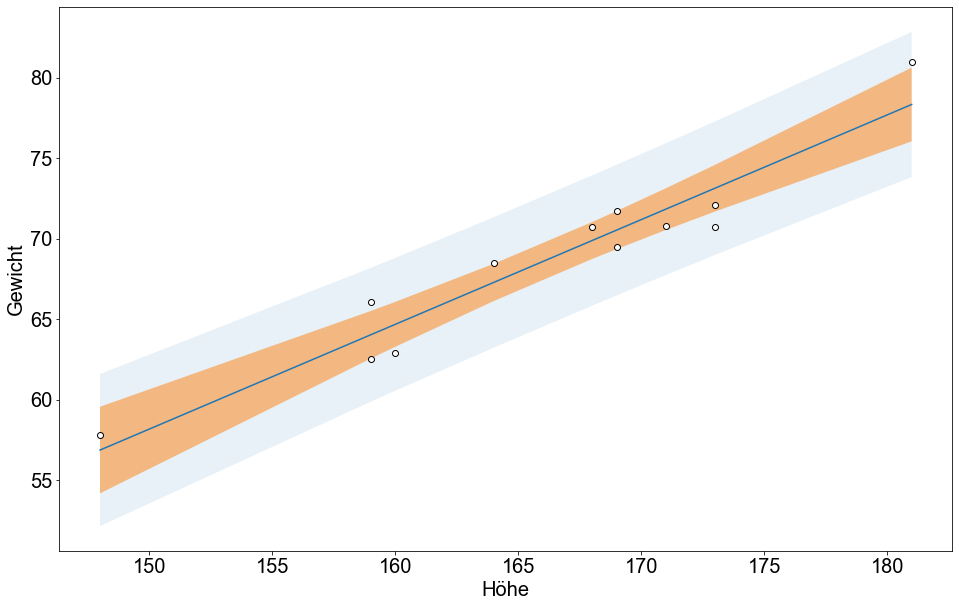

In [100]:
data= data.sort_values(by=['height'])
model_predictions = model_predictions.sort_values(by=['mean'])
plt.fill_between(data['height'], model_predictions['obs_ci_lower'], model_predictions['obs_ci_upper'], alpha=.1, label='Prediction interval')
plt.fill_between(data['height'], model_predictions['mean_ci_lower'], model_predictions['mean_ci_upper'], alpha=.5, label='Konvidenzinterval')
plt.scatter(data['height'], data['weight'], label='Observed', edgecolor='k', color='white')
plt.plot(data['height'], model_predictions['mean'], label='Regression line')

plt.xlabel('Höhe')
plt.ylabel('Gewicht')
#plt.legend()
plt.show()

Die bequemste Art, um die Eigenschaften eines beliebigen Modellobjekts in Python zusammenzufassen, ist die Methode `summary()`.

In [63]:
model.summary()

C:\Users\zak\anaconda3\envs\srh\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     115.9
Date:                Tue, 17 May 2022   Prob (F-statistic):           8.05e-07
Time:                        16:46:11   Log-Likelihood:                -22.602
No. Observations:                  12   AIC:                             49.20
Df Residuals:                      10   BIC:                             50.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.4432     10.057     -3.922      0.003     -61.851     -17.036
height         0.6508      0.060     10.766      0.000       0.516       0.785
==============================================================================
Omnibus:                        2.161   Durbin-Watson:                   1.442
Prob(Omnibus):                  0.339   Jarque-Bera (JB):                0.923
Skew:                           0.110   Prob(JB):                        0.630
Kurtosis:                       1.659   Cond. No.                     3.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Auf die Ausgabe der Zusammenfassungsfunktion für ein lineares Modellobjekt wird im nächsten Abschnitt über die Modelldiagnose näher eingegangen.